# **Setting & Introduction**

## **1. Github 연동**

In [1]:
""" github 연동 """
!git clone https://github.com/ku-sungsukim/2025-LGElec-Day11.git ### colab 사용시

Cloning into '2025-LGElec-Day11'...
remote: Enumerating objects: 841, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 841 (delta 21), reused 0 (delta 0), pack-reused 794 (from 2)
Receiving objects: 100% (841/841), 108.67 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (762/762), done.


## **2. 조교소개**

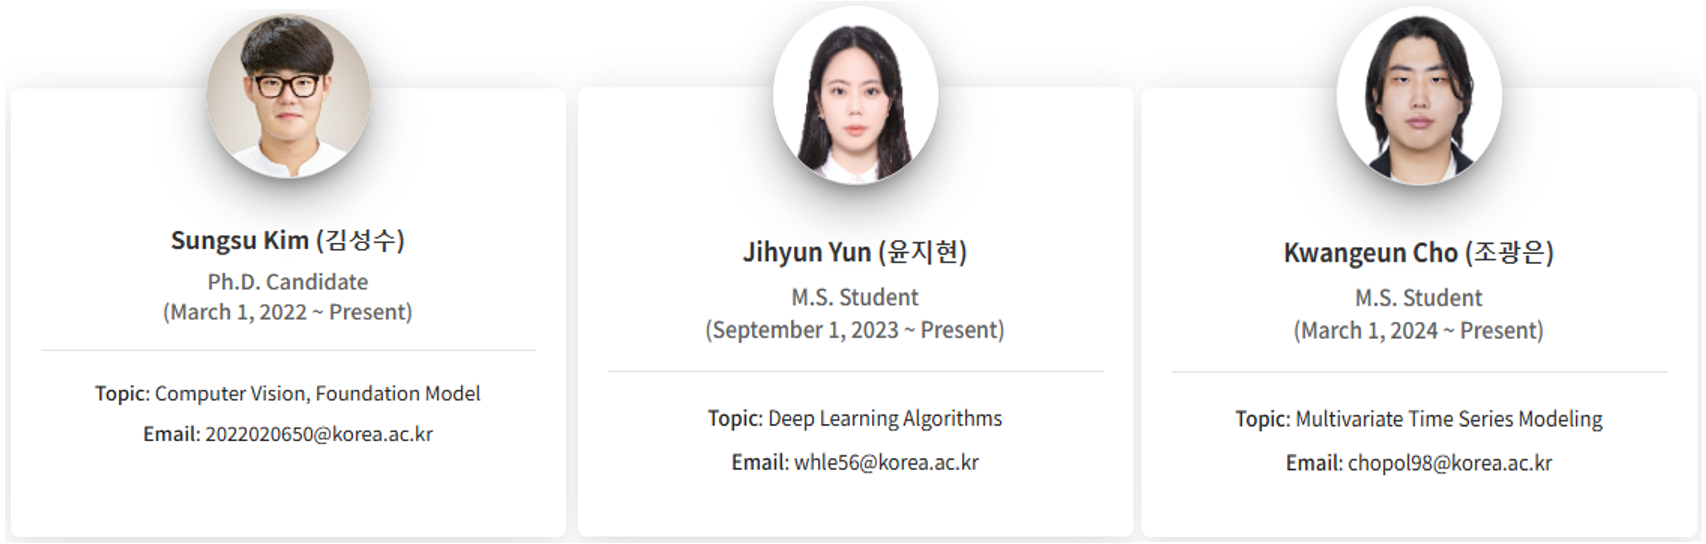

In [2]:
""" 설명 장표 불러오기 """
from IPython.display import Image
# Image('image/image1.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image1.PNG') ### colab 사용시

## **3. About Jupyter Notebook**

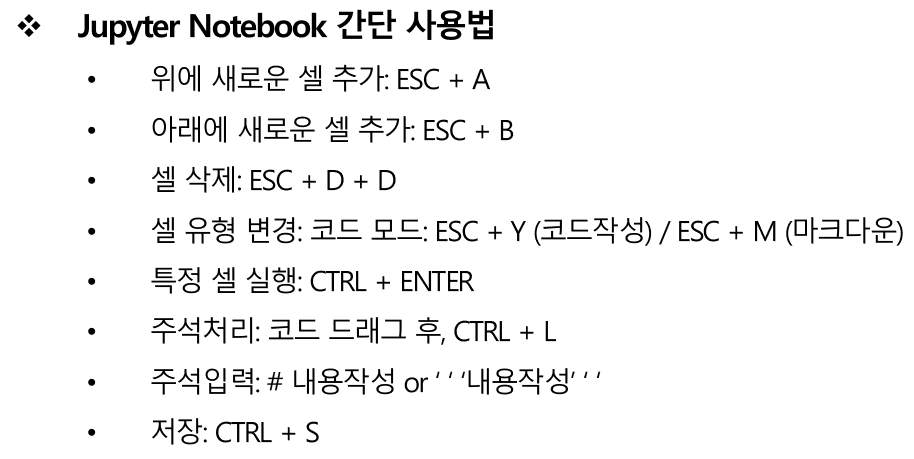

In [3]:
""" 설명 장표 불러오기 """
# Image('image/image2.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image2.PNG') ### colab 사용시

## **4. 강의목차**
 - **Tutorial1. CNN 기본**

 - Tutorial2. CNN을 활용한 이미지 모델링

 - Tutorial3. CNN을 활용한 이미지 모델링 (Advanced)

 - Tutorial4. CNN을 활용한 시계열 모델링

## **Tutorial1 실습: CNN 기본**

 -  이미지 데이터란?

 -  Padding

 -  Convolution

 -  Activation Function

 -  Pooling

 -  Flatten

## **0. 필요 패키지 불러오기**

In [4]:
""" 전처리 관련 패키지 """
import numpy as np
from PIL import Image as Img

""" 딥러닝 모델링 패키지 """
import torch
import torch.nn as nn

""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 이미지 데이터란?**

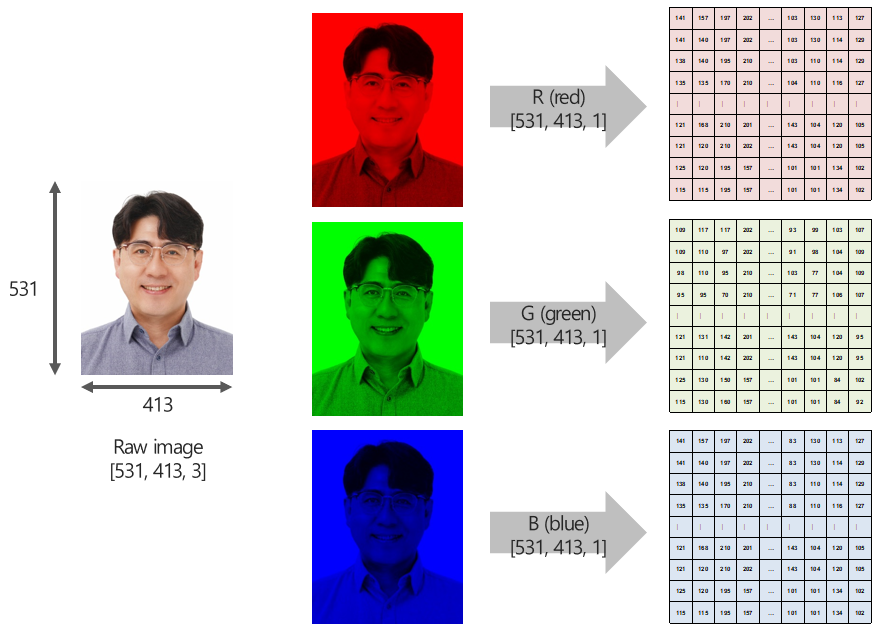

In [5]:
""" 설명 장표 불러오기 """
# Image('image/image3.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image3.PNG') ### colab 사용시

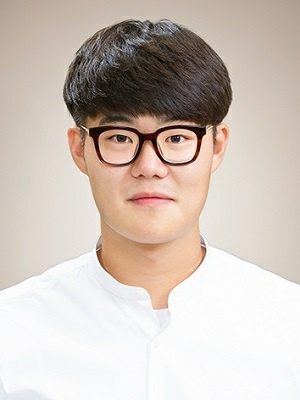

In [6]:
""" 이미지 불러오기 """
# img = Img.open('data/sample_image.jpg') ### 로컬 사용시
img = Img.open('/content/2025-LGElec-Day11/data/sample_image.jpg') ### colab 사용시
img

array([[[175, 159, 146],
        [175, 159, 146],
        [175, 159, 146],
        ...,
        [174, 158, 143],
        [174, 158, 143],
        [174, 158, 143]],

       [[175, 159, 146],
        [175, 159, 146],
        [175, 159, 146],
        ...,
        [174, 158, 143],
        [174, 158, 143],
        [174, 158, 143]],

       [[176, 160, 147],
        [175, 159, 146],
        [174, 158, 145],
        ...,
        [175, 159, 144],
        [174, 158, 143],
        [174, 158, 143]],

       ...,

       [[233, 236, 241],
        [232, 235, 240],
        [230, 235, 239],
        ...,
        [246, 247, 251],
        [246, 247, 251],
        [246, 247, 251]],

       [[232, 235, 240],
        [231, 234, 239],
        [229, 234, 238],
        ...,
        [247, 248, 252],
        [247, 248, 252],
        [247, 248, 252]],

       [[232, 235, 240],
        [231, 234, 239],
        [229, 234, 238],
        ...,
        [246, 247, 251],
        [246, 247, 251],
        [245, 246, 250]]], dtype=uint8)
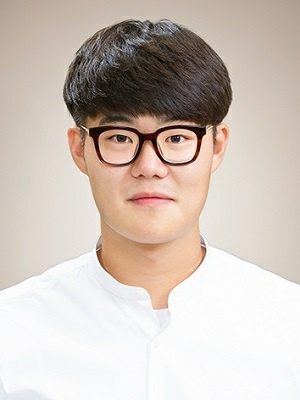

In [7]:
""" 이미지 숫자 구성 확인 """
img_array = np.array(img)
img_array

In [8]:
""" 이미지 형태 확인 """
img_array.shape ### H, W, C

(400, 300, 3)

[[175 175 175 ... 174 174 174]
 [175 175 175 ... 174 174 174]
 [176 175 174 ... 175 174 174]
 ...
 [233 232 230 ... 246 246 246]
 [232 231 229 ... 247 247 247]
 [232 231 229 ... 246 246 245]] 

(400, 300) 



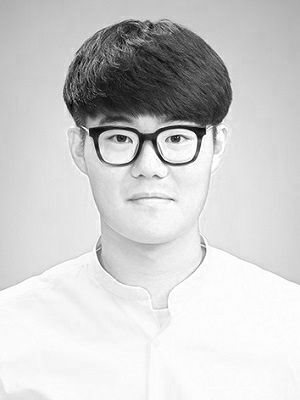

In [9]:
""" RGB 中 R 확인 """
print(img_array[:, :, 0], '\n')
print(img_array[:, :, 0].shape, '\n')
Img.fromarray(img_array[:, :, 0])

[[159 159 159 ... 158 158 158]
 [159 159 159 ... 158 158 158]
 [160 159 158 ... 159 158 158]
 ...
 [236 235 235 ... 247 247 247]
 [235 234 234 ... 248 248 248]
 [235 234 234 ... 247 247 246]] 

(400, 300) 



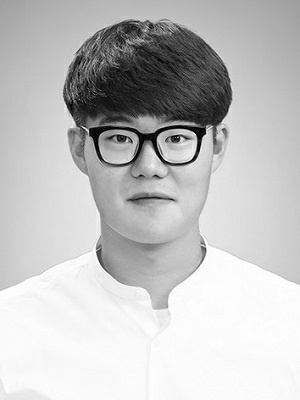

In [10]:
""" RGB 中 G 확인 """
print(img_array[:, :, 1], '\n')
print(img_array[:, :, 1].shape, '\n')
Img.fromarray(img_array[:, :, 1])

[[146 146 146 ... 143 143 143]
 [146 146 146 ... 143 143 143]
 [147 146 145 ... 144 143 143]
 ...
 [241 240 239 ... 251 251 251]
 [240 239 238 ... 252 252 252]
 [240 239 238 ... 251 251 250]] 

(400, 300) 



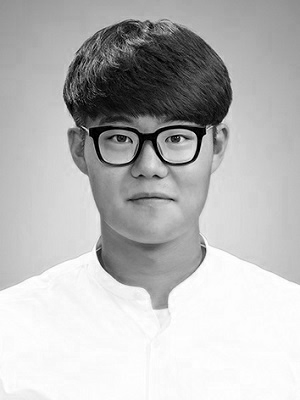

In [11]:
""" RGB 中 B 확인 """
print(img_array[:, :, 2], '\n')
print(img_array[:, :, 2].shape, '\n')
Img.fromarray(img_array[:, :, 2])

## **2. Padding**

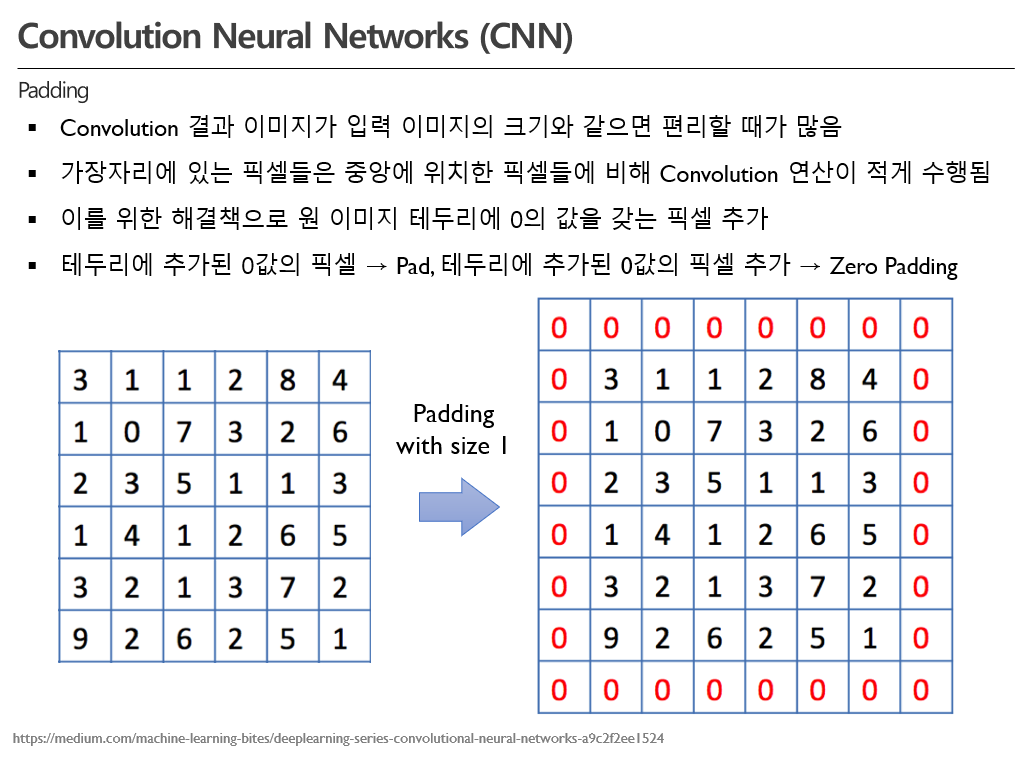

In [12]:
""" 설명 장표 불러오기 """
# Image('image/image4.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image4.PNG') ### colab 사용시

In [13]:
""" 실제 padding 수행 """

"""
pad_width: (top, bottom), (left, right), (channel_before, channel_after) 보통 channel 부분은 0으로 사용!
mode='constant', constant_values=0: 특정값("constant_valus")으로 가장자리를 패딩
"""

padded_img_array = np.pad(img_array, pad_width=((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0) #### constant_values=0 페딩을 0으로 채움!

### 결과 출력
print(f"Original Image Shape: {img_array.shape}")
print(f"Padded Image Shape: {padded_img_array.shape}\n")
print(f"Padded Image Array \n {padded_img_array}")

Original Image Shape: (400, 300, 3)
Padded Image Shape: (402, 302, 3)

Padded Image Array 
 [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [175 159 146]
  [175 159 146]
  ...
  [174 158 143]
  [174 158 143]
  [  0   0   0]]

 [[  0   0   0]
  [175 159 146]
  [175 159 146]
  ...
  [174 158 143]
  [174 158 143]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [232 235 240]
  [231 234 239]
  ...
  [247 248 252]
  [247 248 252]
  [  0   0   0]]

 [[  0   0   0]
  [232 235 240]
  [231 234 239]
  ...
  [246 247 251]
  [245 246 250]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [14]:
""" R채널만 따로 확인 """
print(padded_img_array[: ,: ,0])

[[  0   0   0 ...   0   0   0]
 [  0 175 175 ... 174 174   0]
 [  0 175 175 ... 174 174   0]
 ...
 [  0 232 231 ... 247 247   0]
 [  0 232 231 ... 246 245   0]
 [  0   0   0 ...   0   0   0]]


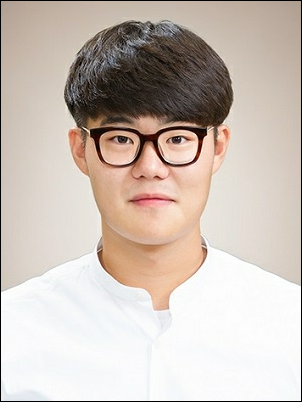

In [15]:
""" 이미지 확인 """

"""
1픽셀 정도 늘어난거라 이미지 상에서는 거의 티가 나지 않음
"""

Img.fromarray(padded_img_array)

## **3. Convolution**
 - HxW 이미지를 nxm 크기 필터 행렬로 처음부터 끝까지 훑어봄

 - 훑는 과정에서 필터 행렬과 이미지 내 겹치는 영역 내 원소값들을 모두 곱한 후 합산

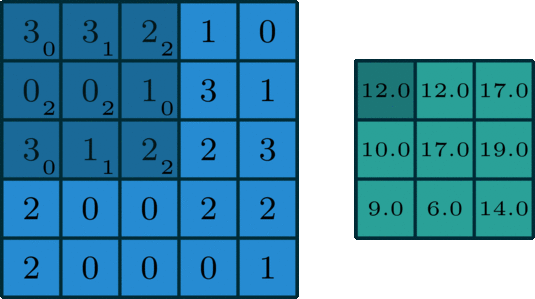

In [16]:
""" 설명 장표 불러오기 """
# Image('image/image5.gif') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image5.gif') ### colab 사용시

In [17]:
""" Convolution 원리 살펴보기 """
image = np.array([[3, 3, 2, 1, 0],
                  [0, 0, 1, 3, 1],
                  [3, 1, 2, 2, 3],
                  [2, 0, 0, 2, 2],
                  [2, 0, 0, 0, 1]])

filter = np.array([[0, 1, 2],
                    [2, 2, 0],
                    [0, 1, 2]])

print(f'Input Data (5x5): \n {image} \n')
print(f'filter (3x3): \n {filter}')

Input Data (5x5): 
 [[3 3 2 1 0]
 [0 0 1 3 1]
 [3 1 2 2 3]
 [2 0 0 2 2]
 [2 0 0 0 1]] 

filter (3x3): 
 [[0 1 2]
 [2 2 0]
 [0 1 2]]


In [18]:
""" Convolution 실제 구현 """

image_h, image_w = image.shape
filter_h, filter_w = filter.shape

### Convolution 연산
result = []
for i in range(image_h - filter_h + 1):
    for j in range(image_w - filter_w + 1):
        conv = (image[i:i+filter_w, j:j+filter_w] * filter).sum()
        result.append(conv)

### 최종결과
output = np.array(result).reshape(3, 3)
print(f'Output: \n {output}')  ### 5x5 -> 3x3

Output: 
 [[12 12 17]
 [10 17 19]
 [ 9  6 14]]


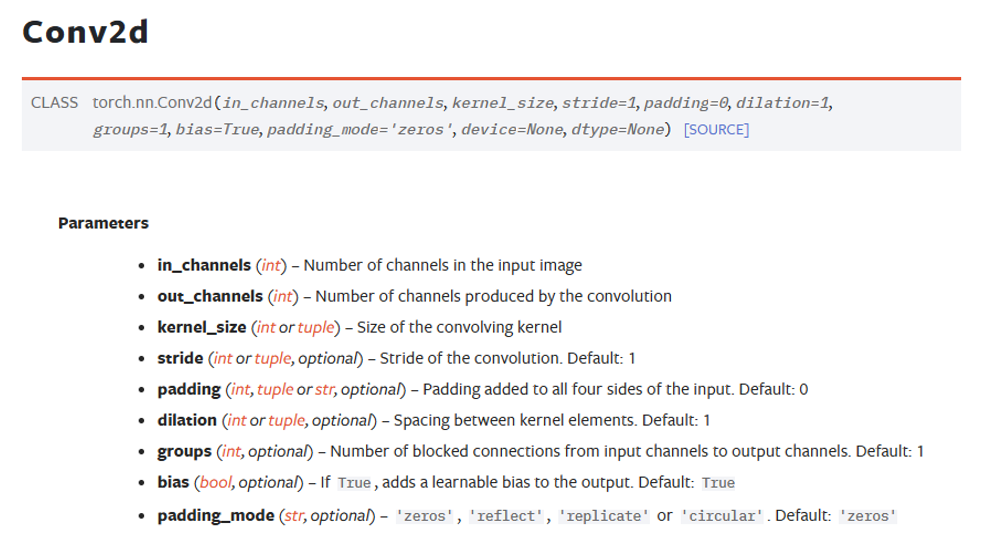

In [19]:
""" 설명 장표 불러오기 """
# Image('image/image6.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image6.PNG') ### colab 사용시

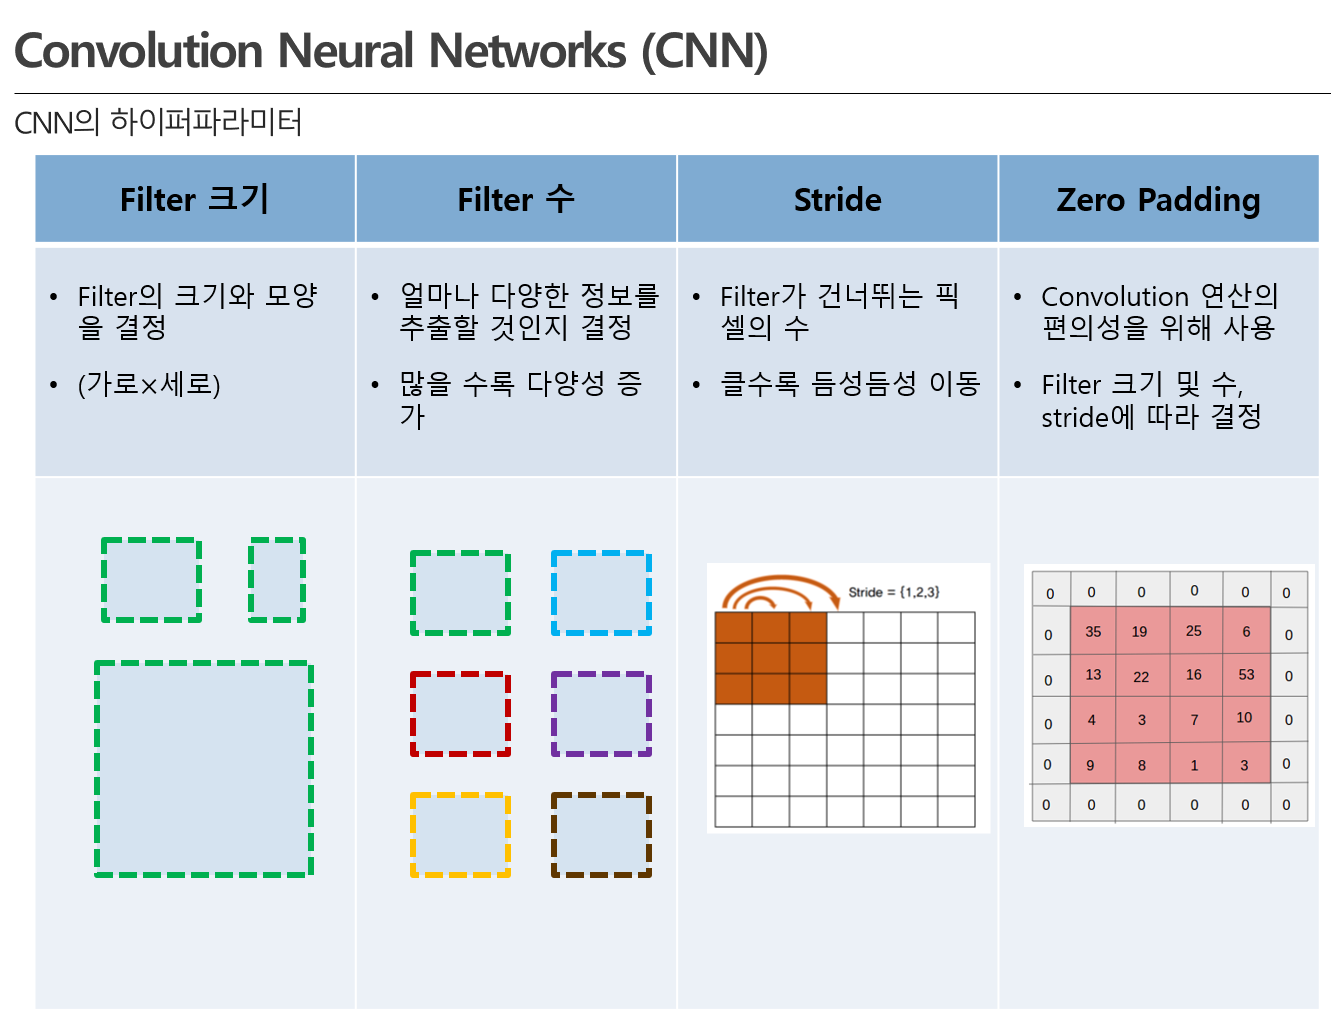

In [20]:
""" 설명 장표 불러오기 """
# Image('image/image7.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image7.PNG') ### colab 사용시

In [21]:
""" 2D Convolution in pytorch """

"""
nn.conv2d
 - in_channels: 입력하는 이미지(또는 feature)의 채널 크기
 - out_channels: 출력하고자 하는 channel 개수
 - filter_size: Convolution 필터 크기
 - stride: Convolution 시, 움직이는 보폭
 - padding=1: 상하좌우 1개씩 padding 추가
 - padding_mode='zeros': padding 시 zero-padding 수행
"""

### 이미지 정의: (Batch Size, Channel, Height, Width)
imgs = torch.randn(32, 3, 64, 64)

### Convolution 연산 정의
conv2d_layer = nn.Conv2d(in_channels=3,
                       out_channels=16,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=1,
                       padding_mode='zeros')

### Convolution 연산 수행
output = conv2d_layer(imgs)
print(output.shape)

torch.Size([32, 16, 64, 64])


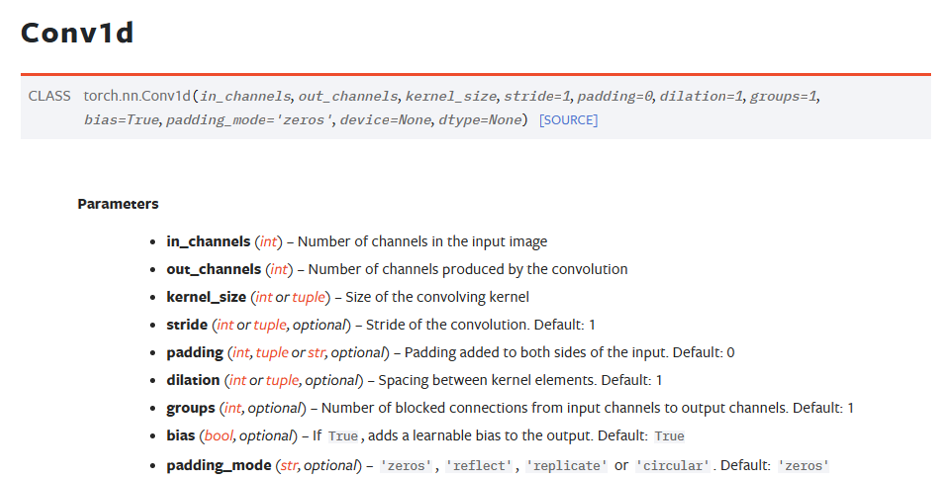

In [22]:
""" 설명 장표 불러오기 """
# Image('image/image8.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image8.PNG') ### colab 사용시

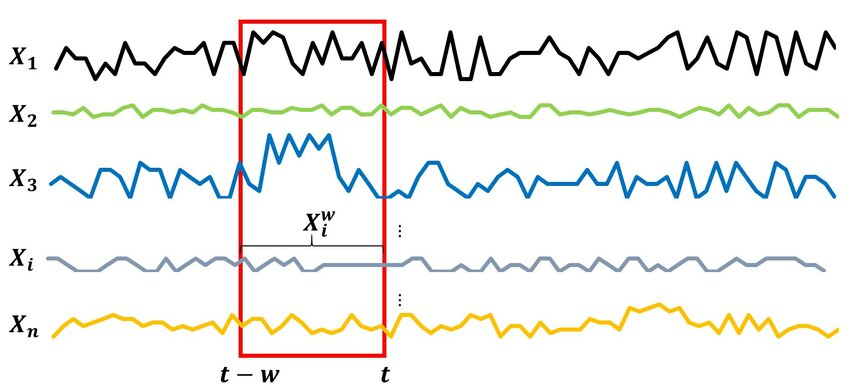

In [23]:
""" 설명 장표 불러오기 """
# Image('image/image9.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image9.PNG') ### colab 사용시

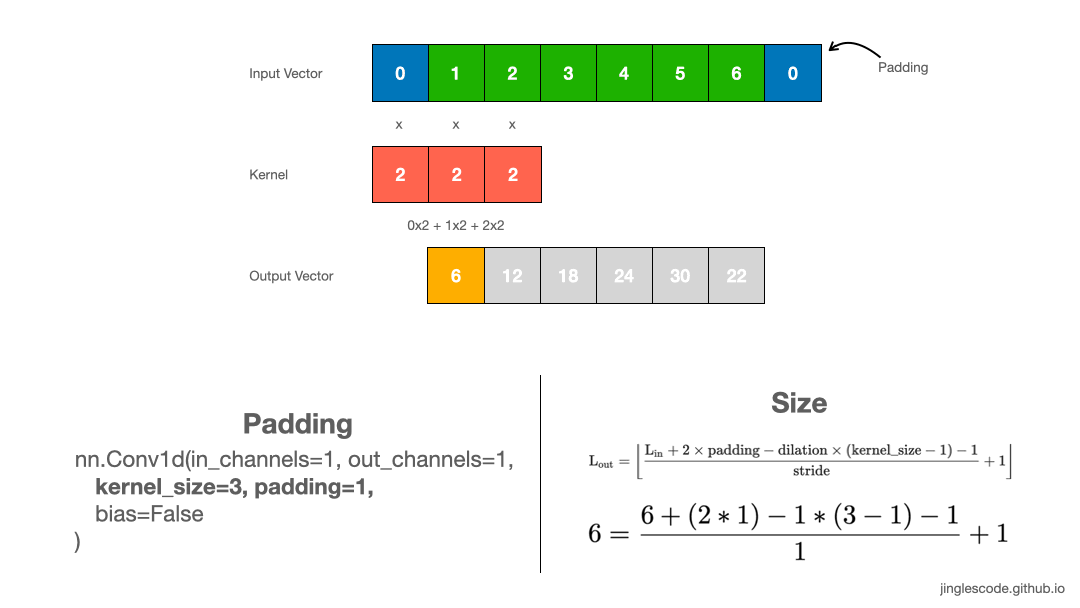

In [24]:
""" 설명 장표 불러오기 """
# Image('image/image10.gif') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image10.gif') ### colab 사용시

In [25]:
""" 1D Convolution in pytorch """

"""
nn.conv1d
 - in_channels: 입력하는 데이터(또는 feature)의 채널 크기
 - out_channels: 출력하고자 하는 channel 개수
 - filter_size: Convolution 필터 크기
 - stride: Convolution 시, 움직이는 보폭
 - padding=1: 상하좌우 1개씩 padding 추가
 - padding_mode='zeros': padding 시 zero-padding 수행
"""

### 이미지 정의: (Batch Size, Channel, Sequence_length)
ts_tensor = torch.randn(32, 16, 6)

### Convolution 연산 정의
conv1d_layer = nn.Conv1d(in_channels=16,
                        out_channels=20,
                        kernel_size=3,
                        stride=1,
                        padding=1,
                        padding_mode='zeros')

### Convolution 연산 수행
output = conv1d_layer(ts_tensor)
print(output.shape)

torch.Size([32, 20, 6])


## **4. Activation Function**

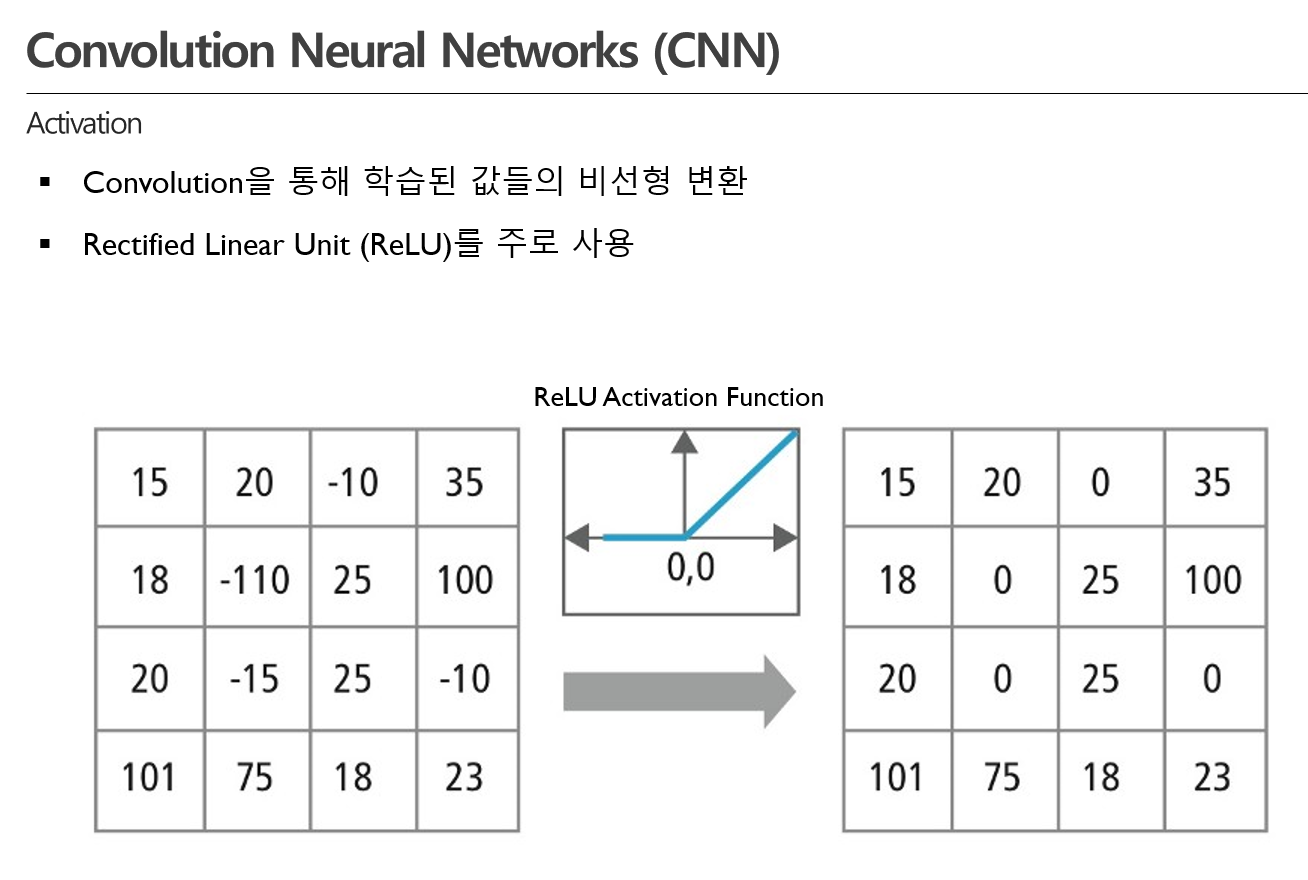

In [26]:
""" 설명 장표 불러오기 """
# Image('image/image11.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image11.PNG') ### colab 사용시

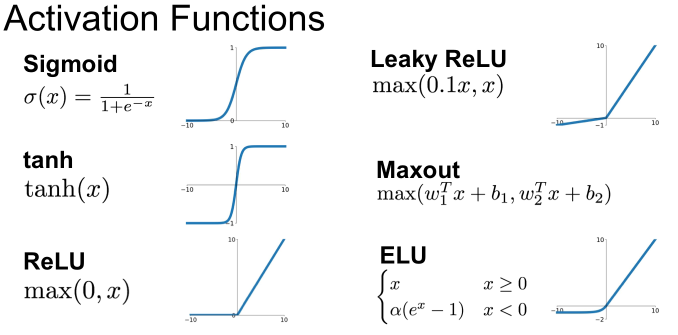

In [27]:
""" 설명 장표 불러오기 """
# Image('image/image12.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image12.PNG') ### colab 사용시

In [28]:
""" Activation Function 적용 """
x = torch.FloatTensor([[-1, 1]])

sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
relu = nn.ReLU()
leakyrelu = nn.LeakyReLU()

print(f"sigmoid: {x} --> {sigmoid(x)}")
print(f"tanh: {x} --> {tanh(x)}")
print(f"relu: {x} --> {relu(x)}")
print(f"leakyrelu: {x} --> {leakyrelu(x)}")

sigmoid: tensor([[-1.,  1.]]) --> tensor([[0.2689, 0.7311]])
tanh: tensor([[-1.,  1.]]) --> tensor([[-0.7616,  0.7616]])
relu: tensor([[-1.,  1.]]) --> tensor([[0., 1.]])
leakyrelu: tensor([[-1.,  1.]]) --> tensor([[-0.0100,  1.0000]])


## **5. Pooling**

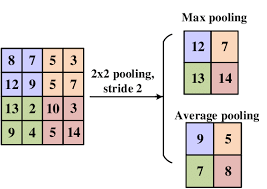

In [29]:
""" 설명 장표 불러오기 """
# Image('image/image13.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image13.PNG') ### colab 사용시

In [30]:
""" 2D Pooling """
imgs = torch.randint(0, 5, size=(1, 1, 4, 4)).float()

maxpool = nn.MaxPool2d(kernel_size=(2, 2),stride=(1, 1))
avgpool = nn.AvgPool2d(kernel_size=(2, 2),stride=(2, 2))

print('원본 텐서','\n',imgs,'\n')
print('maxpooling :','\n',maxpool(imgs),'\n')
print('avgpooling :','\n',avgpool(imgs),'\n')

원본 텐서 
 tensor([[[[2., 0., 1., 4.],
          [2., 0., 2., 1.],
          [4., 4., 0., 3.],
          [4., 0., 2., 1.]]]]) 

maxpooling : 
 tensor([[[[2., 2., 4.],
          [4., 4., 3.],
          [4., 4., 3.]]]]) 

avgpooling : 
 tensor([[[[1.0000, 2.0000],
          [3.0000, 1.5000]]]]) 



In [31]:
""" 1D Pooling """
x = torch.FloatTensor([[-1, 1, 2, 6]])
maxpool = nn.MaxPool1d(kernel_size=2, stride=1)
avgpool = nn.AvgPool1d(kernel_size=2, stride=2)

print('원본 텐서','\n',x,'\n')
print('maxpooling :','\n',maxpool(x),'\n')
print('avgpooling :','\n',avgpool(x),'\n')

원본 텐서 
 tensor([[-1.,  1.,  2.,  6.]]) 

maxpooling : 
 tensor([[1., 2., 6.]]) 

avgpooling : 
 tensor([[0., 4.]]) 



## **6. Flatten**

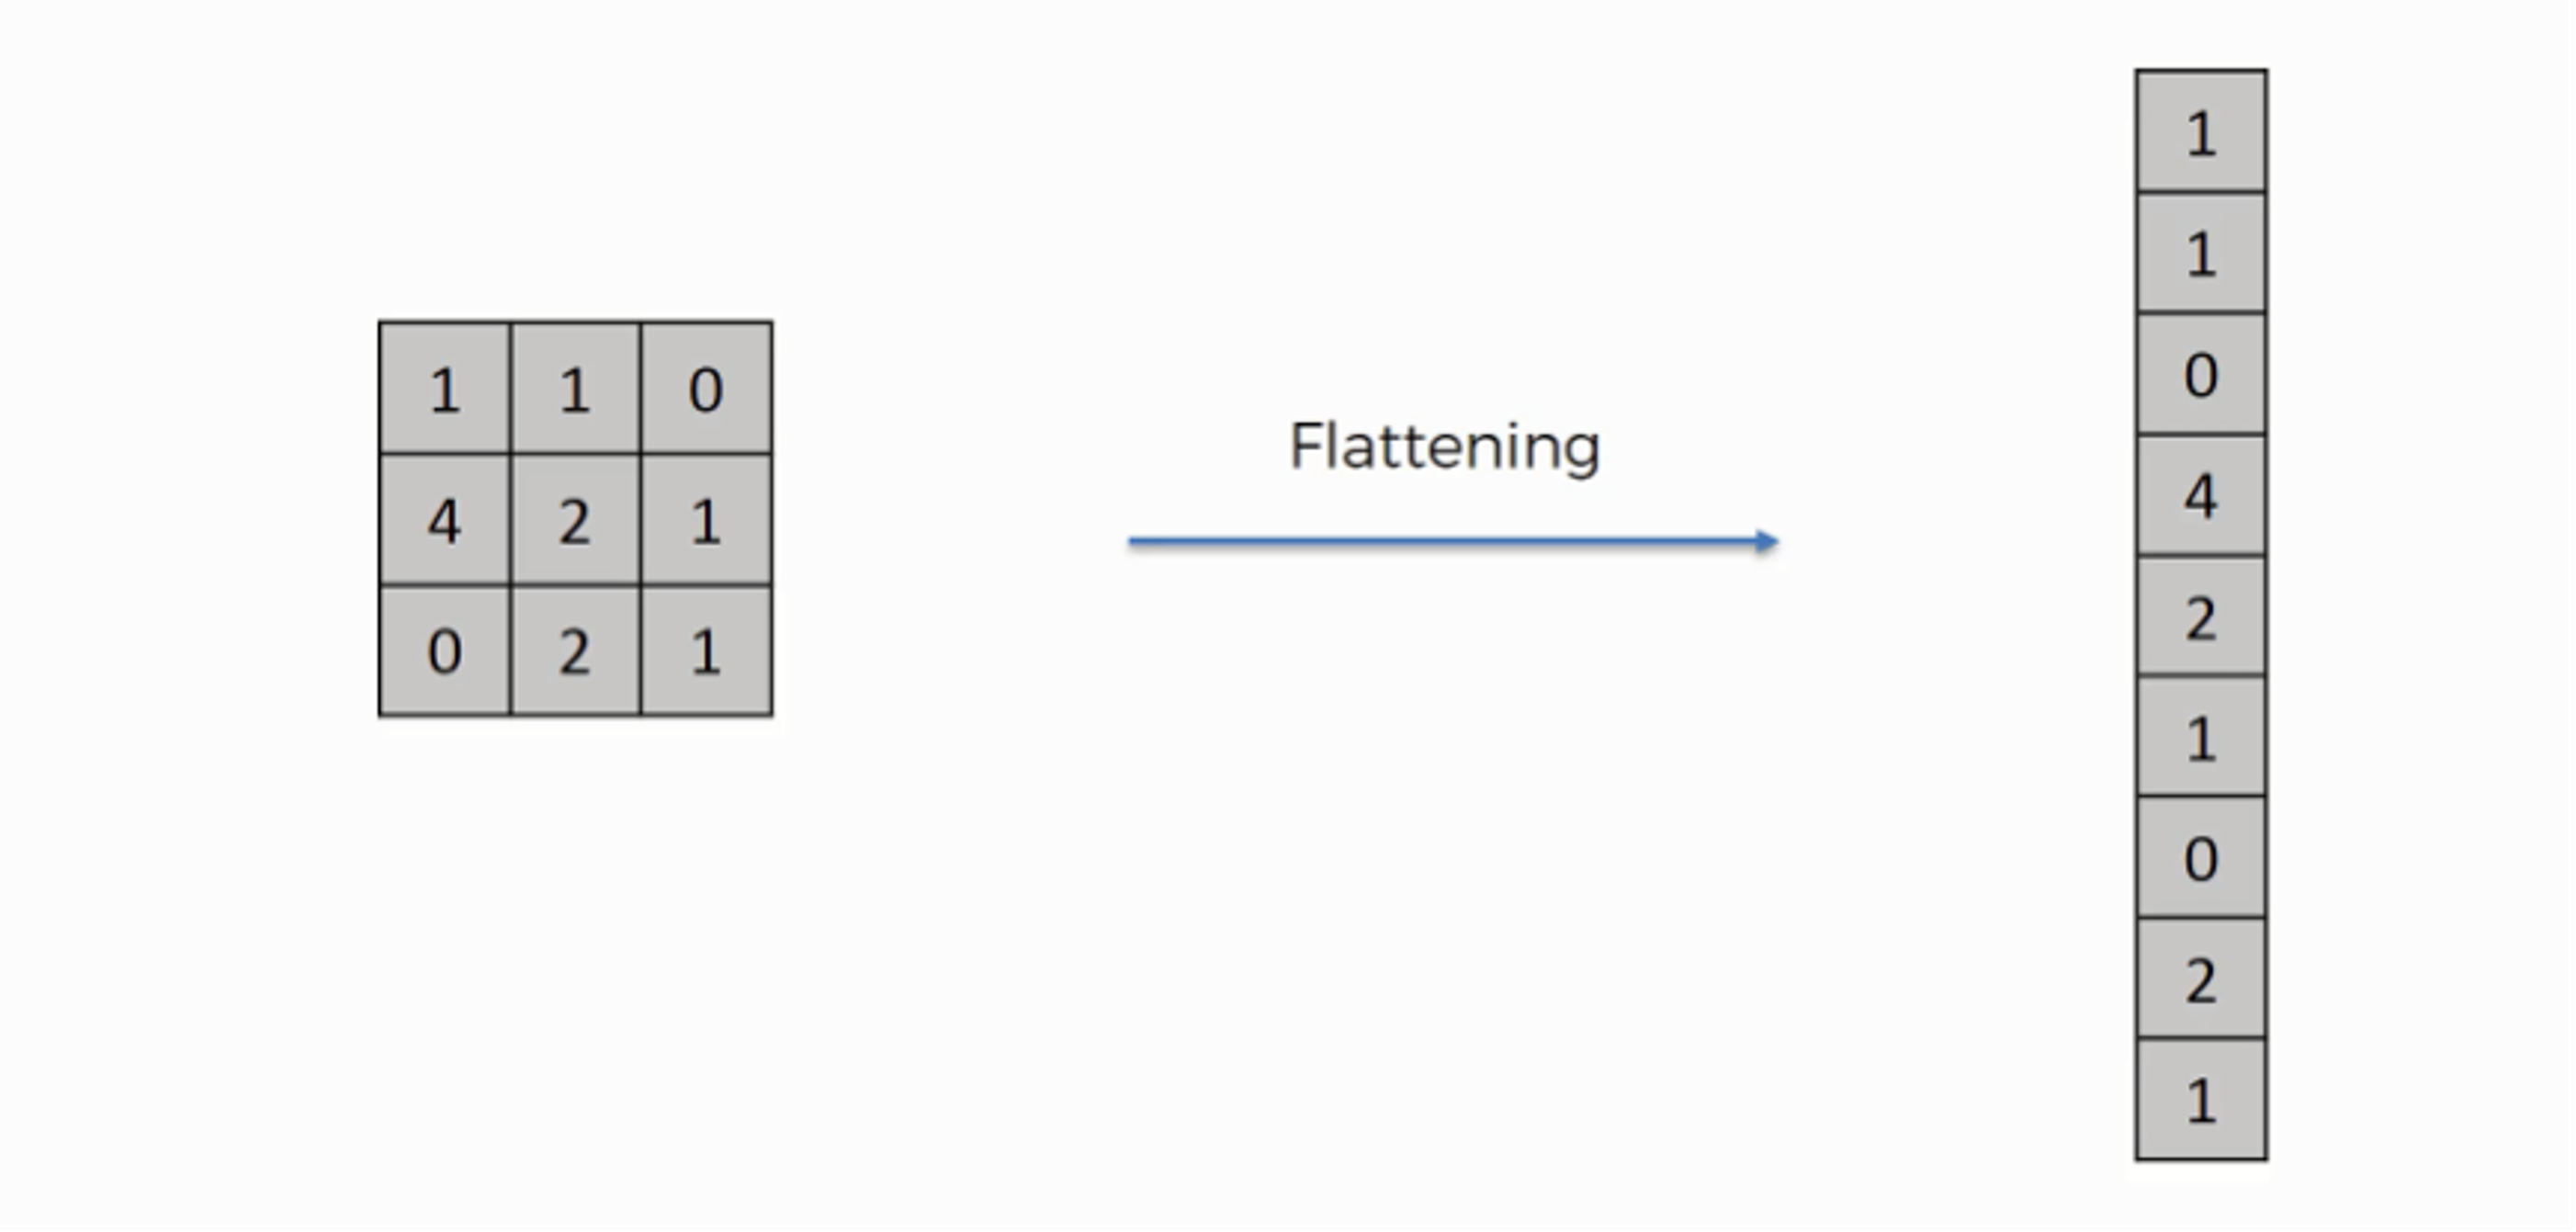

In [32]:
""" 설명 장표 불러오기 """
# Image('image/image14.PNG') ### 로컬 사용시
Image('/content/2025-LGElec-Day11/image/image14.PNG') ### colab 사용시

In [33]:
""" Flatten 실습 """
x = torch.randint(0, 5, (32, 3, 5, 6))

flatten = nn.Flatten(start_dim=1, end_dim=3)
x_flatten = flatten(x)

print(x.shape)
print(x_flatten.shape)

torch.Size([32, 3, 5, 6])
torch.Size([32, 90])


In [34]:
""" view 함수 및 reshape 함수 """
x_view = x.view(x.size(0), -1)
x_reshape = x.reshape(x.size(0), 3, -1)

print(x.shape)
print(x_view.shape)
print(x_reshape.shape)

torch.Size([32, 3, 5, 6])
torch.Size([32, 90])
torch.Size([32, 3, 30])


# **EOD**